In [1]:
import pandas as pd


In [2]:
indicators = pd.read_csv('/content/1960_onwards.csv')
print(indicators.head())

   Year  Consumer price index (2010 = 100)  GDP (constant LCU)  \
0  1960                           0.065886        9.277980e+12   
1  1961                           0.070023        9.295770e+12   
2  1962                           0.073710        9.677180e+12   
3  1963                           0.071724        1.050730e+13   
4  1964                           0.072338        1.102750e+13   

   GDP (current LCU)  GDP growth (annual %)  GDP per capita (current US$)  \
0       2.997269e+09               0.191795                     93.397048   
1       3.190921e+09               0.191795                     97.420968   
2       3.506715e+09               4.102993                    104.852749   
3       3.689709e+09               8.578619                    108.015742   
4       3.966381e+09               4.950489                    113.658375   

   GDP per capita growth (annual %)  Inflation, GDP deflator (annual %)  \
0                         -1.834010                            6.

In [3]:
#Checking for missing data

indicators.isna().sum()

Year                                                        0
Consumer price index (2010 = 100)                           0
GDP (constant LCU)                                          0
GDP (current LCU)                                           0
GDP growth (annual %)                                       0
GDP per capita (current US$)                                0
GDP per capita growth (annual %)                            0
Inflation, GDP deflator (annual %)                          0
Inflation, consumer prices (annual %)                       0
Livestock production index (2014-2016 = 100)                0
Official exchange rate (LCU per US$, period average)        0
Total reserves (includes gold, current US$)                 0
Population, total                                           0
Population, female                                          0
Population, male                                            0
Population ages 0-14 (% of total population)                0
Populati

## Modelling

In [4]:

X = indicators.drop('GDP per capita (current US$)', axis =1)
y = indicators['GDP per capita (current US$)']

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,cross_validate
from sklearn.metrics import r2_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,roc_auc_score,roc_curve,auc,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Gradient Boost Regressor

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
# Assuming you have your scaled data ready
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

# Evaluate the model
r2_score = gbr.score(X_test_scaled, y_test)
print(f"R-squared: {r2_score:.2f}")

#Predictions and Evaluations
predict = gbr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 1.00
Mean Absolute Error: 22.26
Root Mean Squared Error: 37.42


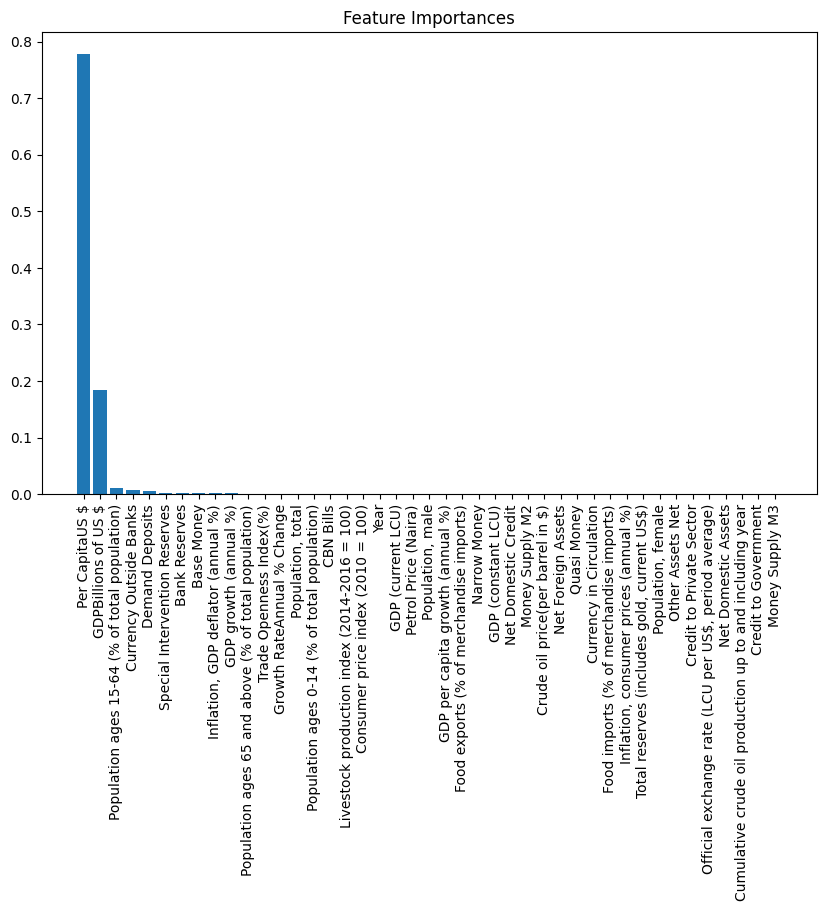

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Get the feature importances
importances = gbr.feature_importances_

# Sort the importances and get the feature names
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
feature_names = [X.columns[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_importances)
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.title("Feature Importances")
plt.show()

## Cross Validation

In [9]:
results = cross_validate(gbr, X_scaled, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

# Print the results
print(f"R-squared Score (mean): {results['test_r2'].mean():.2f}")

print(f"Mean Squared Error (mean): {-results['test_neg_mean_squared_error'].mean():.2f}")

print(f"Root Mean Squared Error (mean): {-results['test_neg_root_mean_squared_error'].mean():.2f}")


R-squared Score (mean): -1.22
Mean Squared Error (mean): 38089.90
Root Mean Squared Error (mean): 162.85


## Hyperparameter Tuning using Gridsearch

In [10]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Gridsearch
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_:.2f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best R-squared Score: 0.99


In [13]:
best_gbr_reg = GradientBoostingRegressor(n_estimators=200,
                                   max_depth=3,
                                   learning_rate=0.1,
                                   random_state=42)


# Fit the model on the training data
best_gbr_reg.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_gbr_reg.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R squared Error : , {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f" Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R squared Error : , 99.84
Mean Absolute Error: 22.26
 Mean Squared Error: 1401.04
Root Mean Squared Error: 37.43


## Using filtered indicators - Gradient Boost Regressor

In [14]:
#Filtering Dataset
# Filter the dataframe to include only the specified columns
filtered_indicators = indicators[['GDP per capita (current US$)', 'Inflation, consumer prices (annual %)', 'Trade Openness Index(%)', 'Crude oil price(per barrel in $)', 'GDP (current LCU)', 'Population, total', 'Currency in Circulation', 'Year']]

# Exclude the year 2024 from the analysis
filtered_indicators = filtered_indicators[filtered_indicators['Year'] != 2024]
filtered_indicators = filtered_indicators.drop('Year',axis=1)
filtered_indicators.head()

,GDP per capita (current US$),"Inflation, consumer prices (annual %)",Trade Openness Index(%),Crude oil price(per barrel in $),GDP (current LCU),"Population, total",Currency in Circulation
0,93.397048,5.444327,26.16651,1.63,2.997269e+09,44928342,154.15
1,97.420968,6.279147,25.48501,1.57,3.190921e+09,45855507,160.19
2,104.852749,5.265632,21.82950,1.53,3.506715e+09,46821845,174.66
3,108.015742,-2.694655,22.31646,1.50,3.689709e+09,47822569,183.30
4,113.658375,0.856793,24.61532,1.45,3.966381e+09,48856332,214.71


In [15]:
#Correlation
corr = filtered_indicators.corr()
corr

,GDP per capita (current US$),"Inflation, consumer prices (annual %)",Trade Openness Index(%),Crude oil price(per barrel in $),GDP (current LCU),"Population, total",Currency in Circulation
GDP per capita (current US$),1.000000,-0.013040,0.090896,0.880464,0.701985,0.839050,0.754557
"Inflation, consumer prices (annual %)",-0.013040,1.000000,0.062562,-0.068040,-0.069162,0.051601,-0.082295
Trade Openness Index(%),0.090896,0.062562,1.000000,0.189518,-0.111686,0.120647,-0.047496
Crude oil price(per barrel in $),0.880464,-0.068040,0.189518,1.000000,0.721618,0.833021,0.783360
GDP (current LCU),0.701985,-0.069162,-0.111686,0.721618,1.000000,0.872385,0.985050
"Population, total",0.839050,0.051601,0.120647,0.833021,0.872385,1.000000,0.912067
Currency in Circulation,0.754557,-0.082295,-0.047496,0.783360,0.985050,0.912067,1.000000


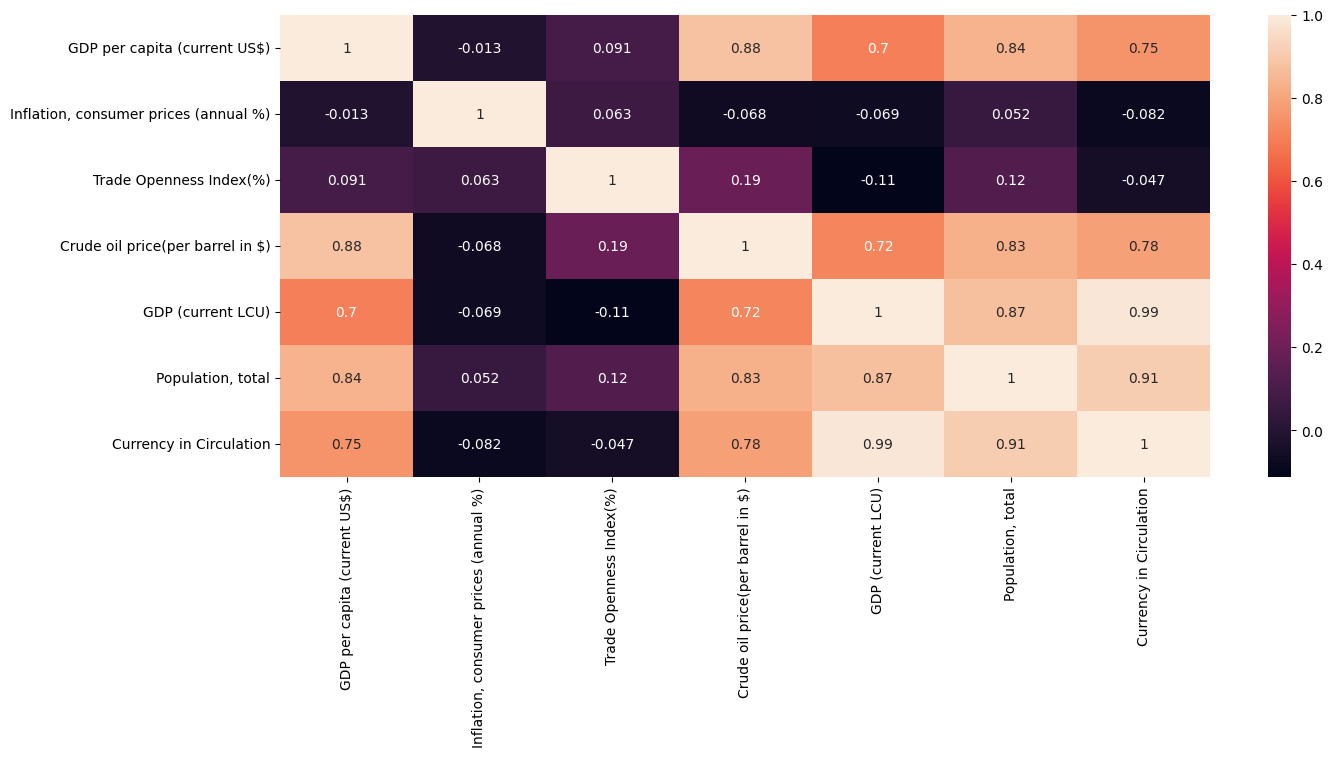

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
#Heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [17]:
X = filtered_indicators.drop('GDP per capita (current US$)', axis =1)
y = filtered_indicators['GDP per capita (current US$)']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming you have your scaled data ready
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Evaluate the model
r2_score = gbr.score(X_test_scaled, y_test)
print(f"R-squared: {r2_score:.2f}")

#Predictions and Evaluations
predict = gbr.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predict)
rmse = mean_squared_error(y_test, predict, squared=False)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.94
Mean Absolute Error: 138.55
Root Mean Squared Error: 223.04


In [20]:
#Cross-Validation
results = cross_validate(gbr, X_scaled, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

# Print the results
print(f"R-squared Score (mean): {results['test_r2'].mean():.2f}")

print(f"Mean Squared Error (mean): {-results['test_neg_mean_squared_error'].mean():.2f}")

print(f"Root Mean Squared Error (mean): {-results['test_neg_root_mean_squared_error'].mean():.2f}")

R-squared Score (mean): -7.72
Mean Squared Error (mean): 401112.06
Root Mean Squared Error (mean): 582.30


In [21]:
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Gridsearch
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding R-squared score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_:.2f}")


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best R-squared Score: 0.75


In [24]:
best_gbr_reg = GradientBoostingRegressor(n_estimators=200,
                                   max_depth=3,
                                   learning_rate=0.1,
                                   random_state=42)


# Fit the model on the training data
best_gbr_reg.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_gbr_reg.predict(X_test_scaled)
error_score = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R squared Error : , {error_score:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f" Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R squared Error : , 93.83
Mean Absolute Error: 136.86
 Mean Squared Error: 49480.05
Root Mean Squared Error: 222.44
